Импортируем все, что нам нужно:

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time

Загружаем данные и разделяем их на тестовую и тренировочную выборки:

In [4]:
data = pd.read_csv('diabetes.csv')  # считываем данные из csv файла
data                                # убедимся, что все считано верно

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
x = data.drop(['Outcome'], axis=1)           # в качестве данных выбираем все, кроме Outcome
y = data['Outcome']                          # в качестве целевой переменной - Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)     # делим на тестовую и тренировочную выборки

Text(0, 0.5, 'F1')

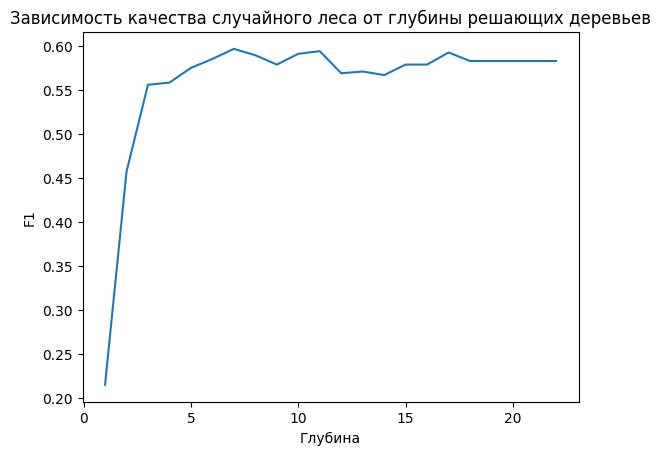

In [ ]:
depths = list(range(1, 23))   # возможные значения глубины деревьев
f1s = []                      # метрики F1
for depth in depths:          # получение метрики F1 для каждой глубины деревьев
	clf = RandomForestClassifier(max_depth=depth, random_state=121)
	clf.fit(x_train, y_train)
	y_pred = clf.predict(x_test)
	f1s.append(f1_score(y_test, y_pred))
plt.plot(depths, f1s)                                                            # строим график
plt.title('Зависимость качества случайного леса от глубины решающих деревьев')   # меняем заголовок графика
plt.xlabel('Глубина')                                                            # меняем название оси OX
plt.ylabel('F1')                                                                 # меняем название оси OY

Качество при увеличении деревьев сначала растет до 7-8 деревьев, а затем почти не изменяется.

Text(0, 0.5, 'F1')

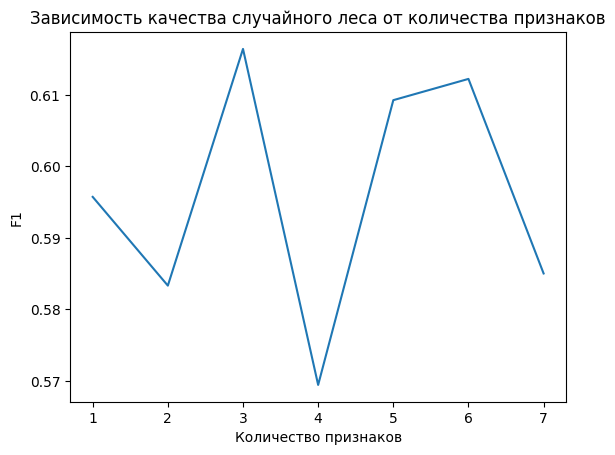

In [ ]:
features = list(range(1, x.shape[1]))    # возможные значения признаков
f1s = []                                 # метрики F1
for feature in features:                 # вычисление метрики F1 для каждого количества признаков
	clf = RandomForestClassifier(max_features=feature, random_state=121)
	clf.fit(x_train, y_train)
	y_pred = clf.predict(x_test)
	f1s.append(f1_score(y_test, y_pred))
plt.plot(features, f1s)                                                       # строим график
plt.title('Зависимость качества случайного леса от количества признаков')     # меняем заголовок графика
plt.xlabel('Количество признаков')                                            # меняем название оси OX
plt.ylabel('F1')                                                              # меняем название оси OY

Качество получилось лучшим при 3 признаках.

Text(0, 0.5, 'F1')

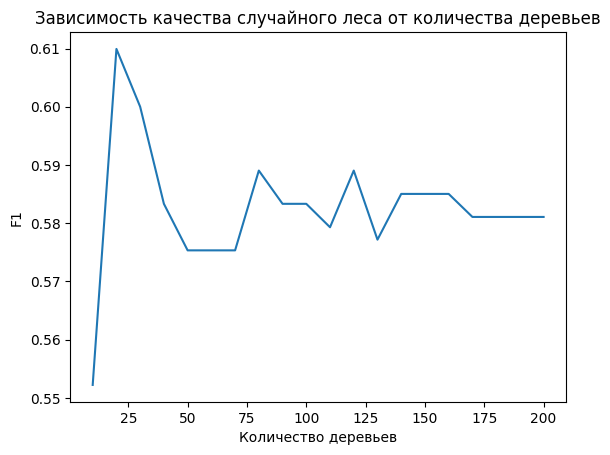

In [ ]:
trees = list(range(10, 210, 10))        # возможные значения количества деревьев
f1s = []                                # метрики F1
times = []                              # затраченное время
for tree in trees:                      # ищем метрики F1 для каждого количества деревьев, а также ищем затраченное время для каждого количества
	clf = RandomForestClassifier(n_estimators=tree, random_state=121)
	start_time = time.time()
	clf.fit(x_train, y_train)
	times.append(time.time() - start_time)
	y_pred = clf.predict(x_test)
	f1s.append(f1_score(y_test, y_pred))
plt.plot(trees, f1s)                                                       # строим график
plt.title('Зависимость качества случайного леса от количества деревьев')   # меняем заголовок
plt.xlabel('Количество деревьев')                                          # меняем название оси OX
plt.ylabel('F1')                                                           # меняем название оси OY

При маленьком количестве деревьев качество плохое. При увеличении качество начинает колебаться в диапозоне 0.58-0.60, в силу переобучения

Text(0, 0.5, 'Скорость обучения')

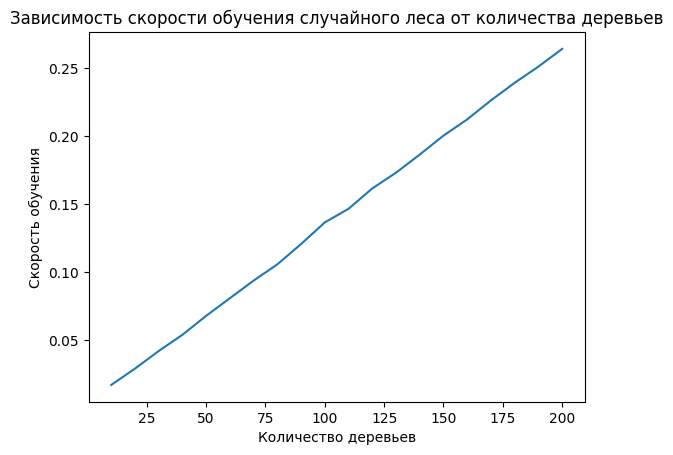

In [ ]:
plt.plot(trees, times)                                                               # строим график зависимости скорости обучения от количества деревьев
plt.title('Зависимость скорости обучения случайного леса от количества деревьев')    # меняем заголовок графика
plt.xlabel('Количество деревьев')                                                    # меняем название оси OX
plt.ylabel('Скорость обучения')                                                      # меняем название оси OY

Скорость обучения случайного леса прямо пропорциональна числу деревьев.
Обучим XGBoost и подберем его гиперпараметры:

In [32]:
from xgboost import XGBClassifier

bst = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8, random_state=121)   # создаем модель
start_time = time.time()                                                                                 # фиксируем время начала обучения
bst.fit(x_train, y_train)                                                                                # обучаем модель
time_for_fit = time.time() - start_time                                                                  # ищем время, потраченное на обучение модели
preds = bst.predict(x_test)                                                                              # просим предсказать значения для тестовой выборки
print('F1: ', f1_score(y_test, preds))                                                                   # ищем метрику F1
print('Время обучения: ', time_for_fit)                                                                  # выводим время обучения

F1:  0.6265060240963856
Время обучения:  0.0827779769897461


Качество XGBoost с подобранными гиперпараметрами оказалось чуть лучше, чем качество всех рассмотренных моделей случайного леса. Время обучения при этом сильно меньше.